In [1]:
import os
os.chdir('../..')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'datasets\customer-churn\telco-customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop('customerID', axis=1, inplace=True)

The goal is to predict if the customer will churn.

In [11]:
import json
with open('data.json', 'r') as file:
    data = json.load(file)

data

{'sns_palettes': ['deep',
  'muted',
  'pastel',
  'bright',
  'dark',
  'colorblind',
  'husl',
  'hls',
  'Paired',
  'Accent',
  'Set1',
  'Set2',
  'Set3',
  'tab10',
  'tab20',
  'tab20b',
  'tab20c',
  'viridis',
  'plasma',
  'inferno',
  'magma',
  'cividis',
  'rocket',
  'mako',
  'flare',
  'crest',
  'Blues',
  'Reds',
  'Greens',
  'Oranges',
  'Purples',
  'Greys',
  'YlOrBr',
  'YlOrRd',
  'OrRd',
  'PuBu',
  'PuBuGn',
  'BuPu',
  'GnBu',
  'RdPu',
  'RdYlBu',
  'RdYlGn',
  'RdBu',
  'RdGy',
  'BrBG',
  'PuOr',
  'RdYlBu',
  'RdYlGn']}

In [16]:
random.randrange(0, len(data['sns_palettes'])-1)

30

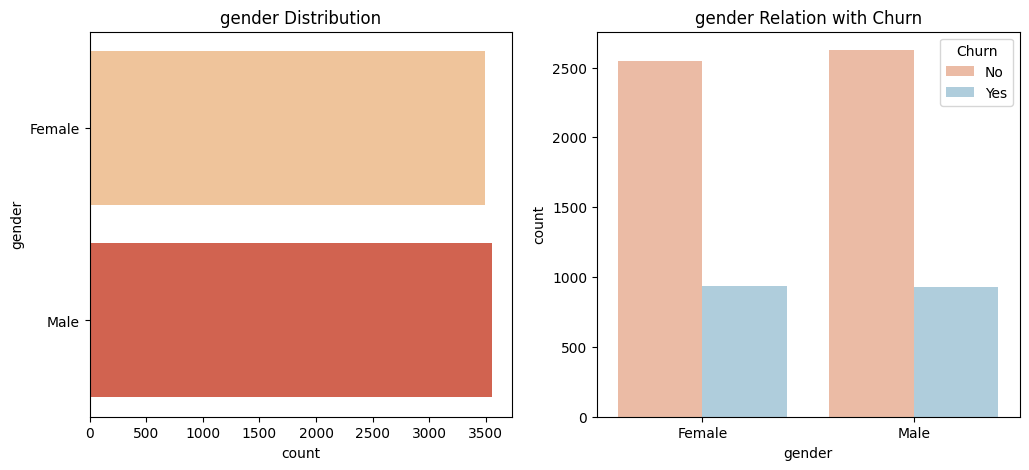

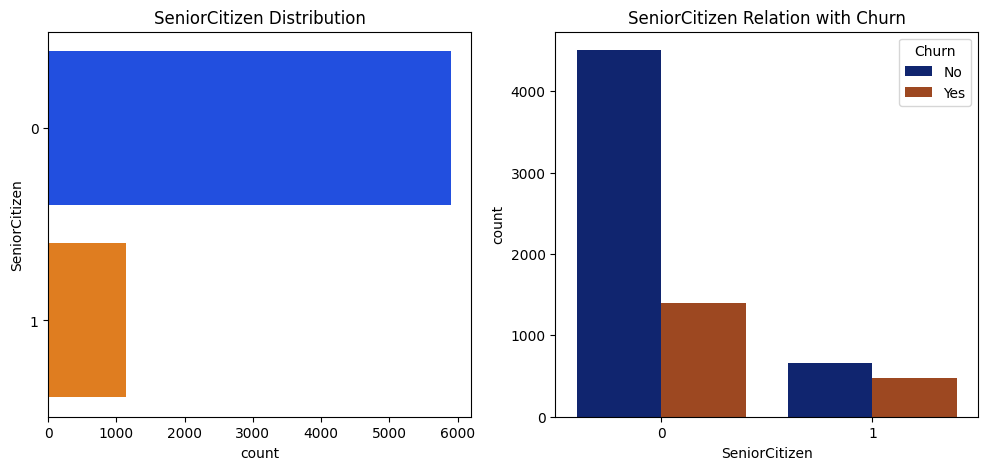

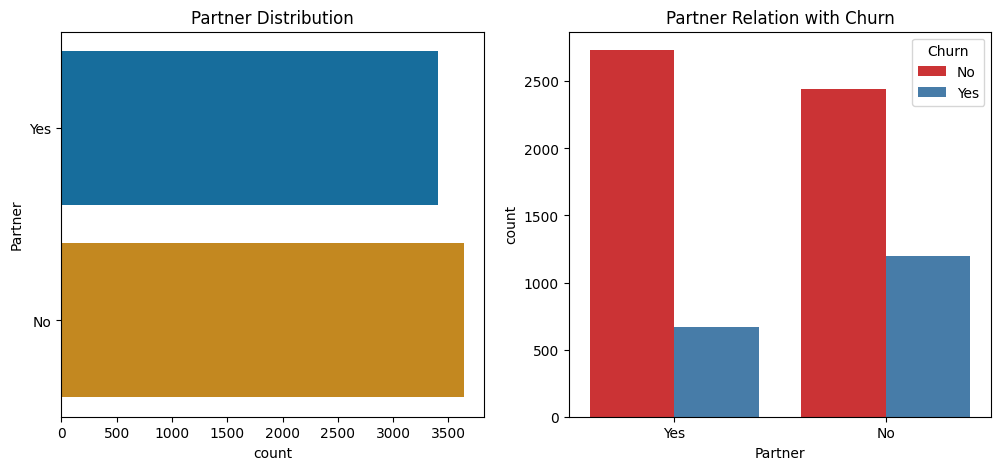

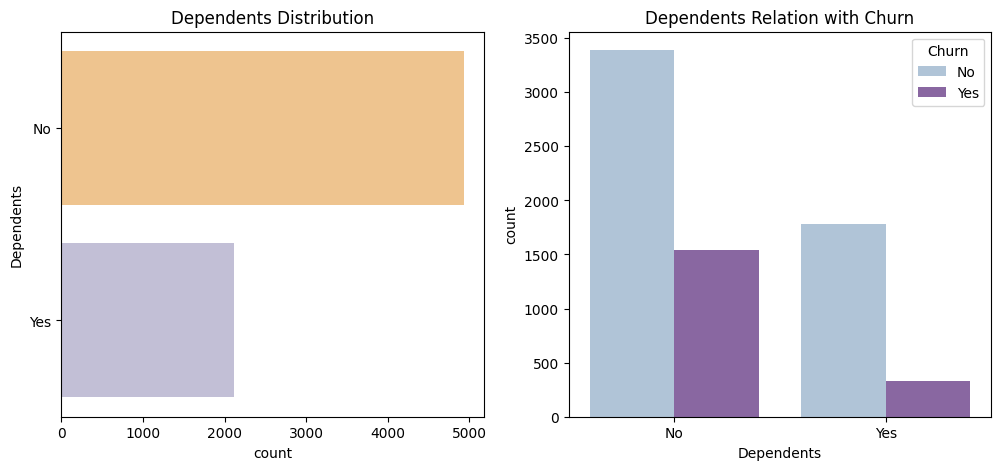

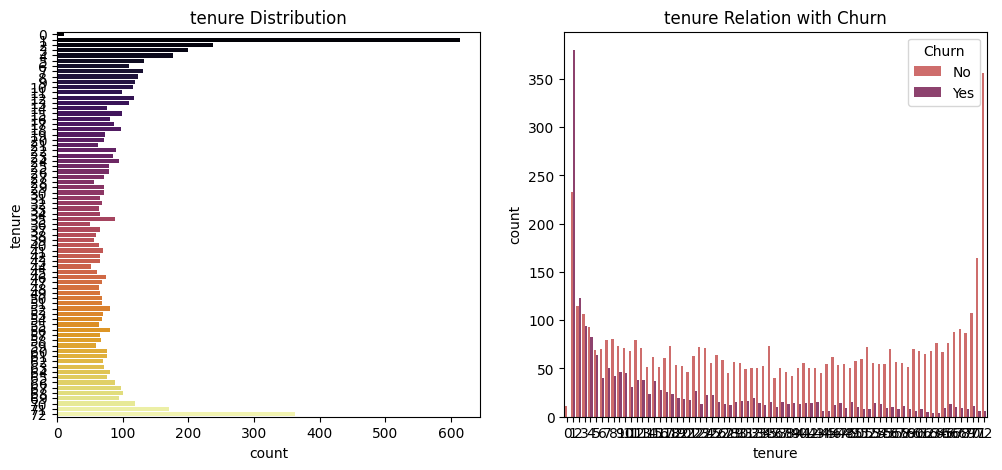

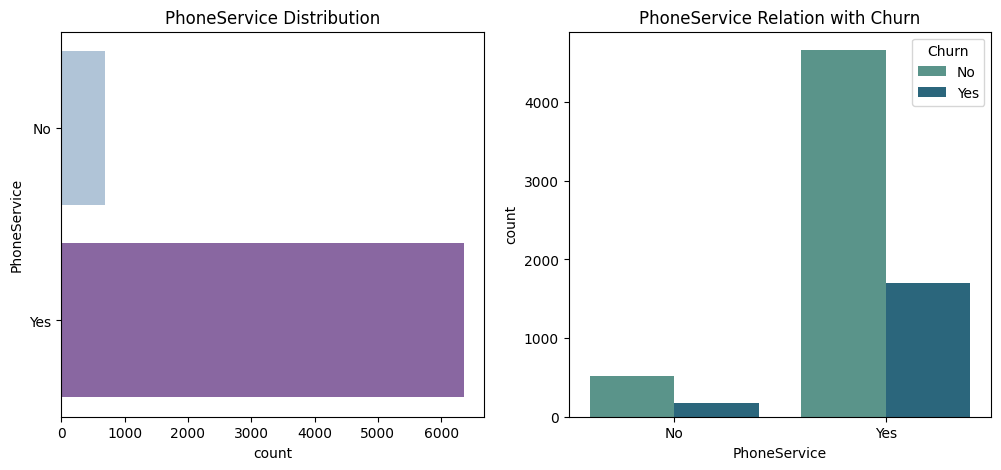

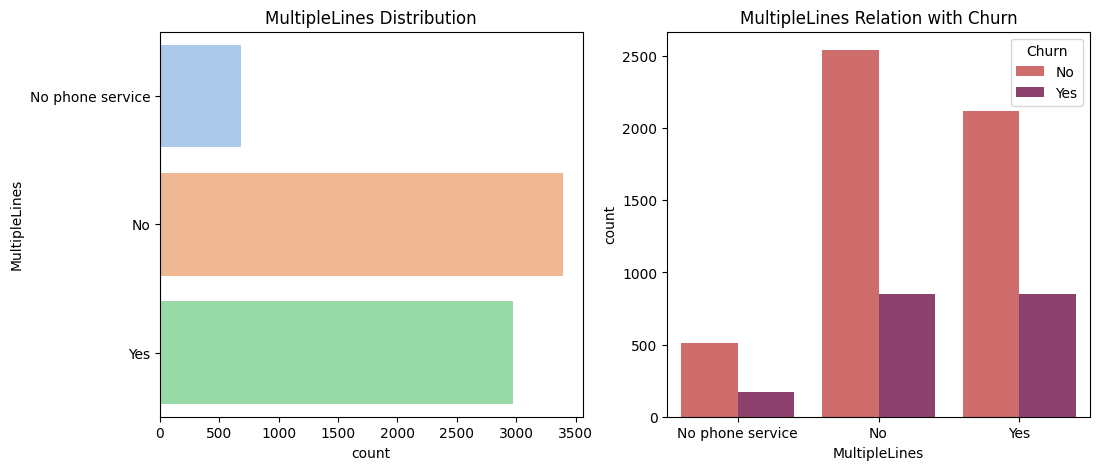

IndexError: list index out of range

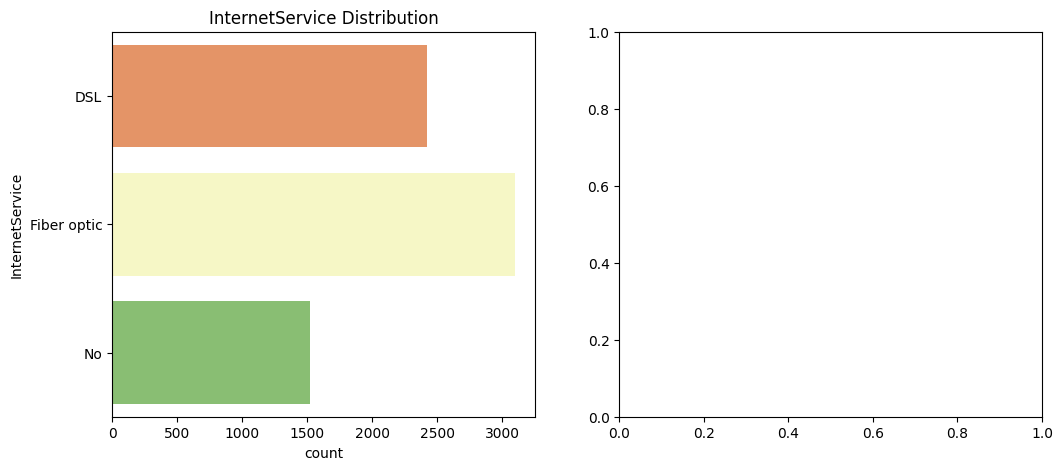

In [19]:
import random
for colname in df.columns:
    palette_idx = random.randint(0, len(data['sns_palettes'])-1)
    palette = data['sns_palettes'][palette_idx]
    fig, axis = plt.subplots(1, 2, figsize=(12, 5))
    axis[0].set_title(f'{colname} Distribution')
    sns.countplot(y=colname, ax=axis[0], hue=colname, data=df, legend=False, palette=palette)

    palette_idx = random.randint(0, len(data['sns_palettes'])-1)
    palette = data['sns_palettes'][palette_idx]
    axis[1].set_title(f'{colname} Relation with Churn')
    sns.countplot(x=df[colname], hue=df['Churn'], ax=axis[1], palette=palette)
    plt.show()

- A rough idea is that: The company's services are priced high. Although, it has less senior citizens but those are also churning at a high rate.
- Not gonna dive deep into business analysis.

### Encoding

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [31]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [36]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)

In [37]:
df['TotalCharges'] = df['TotalCharges'].astype('Float64')

In [39]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [40]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        Float64
Churn                object
dtype: object

In [44]:
featnames = list(df.columns)
feats_to_encode = []
feats_to_scale = []
for featname in featnames:
    if df[featname].dtype != 'O':
        feats_to_scale.append(featname)
    else:
        feats_to_encode.append(featname)

In [45]:
feats_to_scale

['tenure', 'MonthlyCharges', 'TotalCharges']

In [46]:
feats_to_encode

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [49]:
pd.set_option('display.max_columns', None)

In [56]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [59]:
df = pd.concat([df[feats_to_scale], pd.get_dummies(df[feats_to_encode], drop_first=True).astype(int)], axis=1)
df.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.5,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [62]:
df.drop(['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis=1, inplace=True)
df.head(3)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.5,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1


In [65]:
rows_to_drop = df[df['TotalCharges'] == ' ']

In [66]:
rows_to_drop.index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [68]:
df.drop(rows_to_drop.index, inplace=True)

In [70]:
df['TotalCharges'] = df['TotalCharges'].astype('Float64')

In [71]:
df.to_csv('datasets/customer-churn/encoded-unscaled.csv', index=False)